# Lab 3 - Wearable Lab for CDT HDS Biomedical Time Series Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guxiao0822/CDT-TimeSeries/blob/master/labs/lab_3/wearable/CDT_ML4timeseries_Lab_3_Wearable.ipynb)

This lab introduces the use of wearables and AI in digital health applications. You will be working with wearable ECG data annotated with different labels. This tutorial guides you through different approaches (Conventional Pipeline or Deep Learning Pipeline) to classify these signals step by step. Finally, you will test your developed approach based on the signal,  hopefully by yourself, collected from the wearable devices. Please follow the [instructions](CDT_ML4timeseries_Lab_3_Wearable.pdf) to start with the lab step by step.  

Main Contact: Dr Xiao Gu xiao.gu@eng.ox.ac.uk

## Section 0 Load Packages

In this section, we will ensure that all necessary libraries are installed and then import them for use in subsequent sections.

## (Optional) If you use colab, no need to install virtual environment

Run the script, and follow [README.md](../../../README.md) to setup this as your notebook kernel
```bash 
conda create --name lab3wearableEnv2024 python=3.11 -y
conda activate lab3wearableEnv2024
```

## Prerequisites

Make sure you have the following libraries installed:
- `numpy`
- `matplotlib`
- `pickle`
- `neurokit2`
- `scikit-learn`
- `tqdm`
- `PDFReader`
- `PyPDF2`
- `torch` (optional, if using PyTorch for deep learning)

To install these libraries, you can run the following command:
```python
!pip install numpy matplotlib pickle-mixin neurokit2 scikit-learn torch tqdm PDFReader PyPDF2

In [1]:
!pip install numpy matplotlib pickle-mixin neurokit2 scikit-learn torch tqdm PDFReader PyPDF2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 76.8 MB/s eta 0:00:00
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5990 sha256=d3844625ab5071b6f533d6524c5045dce17bad5703b3fe2feeaab45460a1d1bb
  Stored in directory: /home/engs2588/.cache/pip/wheels/d0/9c/0d/8709be17c02b72bf04ea60d8ec64fc46a1554c0fb81e048dd6
Successfully built pickle-mixin


### import relevant packages

In [2]:
# Import Python basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import neurokit2 as nk
import tqdm

# Plot configurations
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['axes.labelsize'] = 16  # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18  # fontsize for figure titles


### download data 
download [ECG.pkl](https://www.dropbox.com/scl/fi/mclrloeiq8cp0zaja1y9l/ECG.pkl?rlkey=mktfkn17ps7wy9t0y2qm71lo0&dl=0) and [ECG_feature.pkl](https://www.dropbox.com/scl/fi/xo25z0gj152g5zyp5yzjl/ECG_feature.pkl?rlkey=xuoa38fbshze99tookekrj90c&dl=0) from dropbox link and put it to lab/lab_3/wearable/data folder

## Section 1 Load and understand data

### download data 
1. (Optional, if you use colab) create .data folder, download the following files to corresponding folder; 
a. Apple watch ECG data: ./data/examplePDF.pdf
b. scripts from github:  ./ECG_feature.py ./HRV_feature.py ./PDFReader.py ./model.py

2. download model development data [ECG.pkl](https://www.dropbox.com/scl/fi/mclrloeiq8cp0zaja1y9l/ECG.pkl?rlkey=mktfkn17ps7wy9t0y2qm71lo0&dl=0) and [ECG_feature.pkl](https://www.dropbox.com/scl/fi/xo25z0gj152g5zyp5yzjl/ECG_feature.pkl?rlkey=xuoa38fbshze99tookekrj90c&dl=0) from dropbox link and put it to ./data folder

### How Data is Saved

The Wearable ECG data is derived from the PhysioNet 2017 AF Classification Challenge, available [here](https://physionet.org/content/challenge-2017/1.0.0/). This data is saved in a dictionary format using the `pickle` module. Each key in the dictionary corresponds to a unique recording identifier, and the associated value is another dictionary containing the following:

- `'data'`: The ECG signal data as a flattened array.
- `'label'`: The label for the ECG signal.

The data is saved to a `.pkl` file, which is a binary file format used by Python's `pickle` module to serialize and deserialize Python objects. Below is an example of how the data might be structured before saving:

```python
data_dict = {
    'A00001': {'data': [0.1, 0.2, 0.3, ...], 'label': 'N'},
    'A00002': {'data': [0.5, 0.4, 0.6, ...], 'label': 'A'},
    ...
}


In [4]:
data_path = './data/ECG.pkl'  # Data path
fs = 300  # Sampling frequency

# Load the ECG data from the .pkl file
with open(data_path, 'rb') as f:
    ecg_data = pk.load(f)

# Print the data
print('Sample Size:', len(ecg_data.keys())) # print sample size
print(list(ecg_data.keys())[:100]) # print the first 100 samples
print(ecg_data['A00001']) # print the first sample


Sample Size: 8528
['A00001', 'A00002', 'A00003', 'A00004', 'A00005', 'A00006', 'A00007', 'A00008', 'A00009', 'A00010', 'A00011', 'A00012', 'A00013', 'A00014', 'A00015', 'A00016', 'A00017', 'A00018', 'A00019', 'A00020', 'A00021', 'A00022', 'A00023', 'A00024', 'A00025', 'A00026', 'A00027', 'A00028', 'A00029', 'A00030', 'A00031', 'A00032', 'A00033', 'A00034', 'A00035', 'A00036', 'A00037', 'A00038', 'A00039', 'A00040', 'A00041', 'A00042', 'A00043', 'A00044', 'A00045', 'A00046', 'A00047', 'A00048', 'A00049', 'A00050', 'A00051', 'A00052', 'A00053', 'A00054', 'A00055', 'A00056', 'A00057', 'A00058', 'A00059', 'A00060', 'A00061', 'A00062', 'A00063', 'A00064', 'A00065', 'A00066', 'A00067', 'A00068', 'A00069', 'A00070', 'A00071', 'A00072', 'A00073', 'A00074', 'A00075', 'A00076', 'A00077', 'A00078', 'A00079', 'A00080', 'A00081', 'A00082', 'A00083', 'A00084', 'A00085', 'A00086', 'A00087', 'A00088', 'A00089', 'A00090', 'A00091', 'A00092', 'A00093', 'A00094', 'A00095', 'A00096', 'A00097', 'A00098', '

### Label Explanation

The labels in the ECG data indicate the type of rhythm or signal quality. Here are the meanings of the different labels:
- `N`: Normal sinus rhythm.
- `A`: Atrial fibrillation.
- `O`: Other rhythm.
- `~`: Noise.

To understand the distribution of these labels in the dataset, we can plot a histogram of the label frequencies.


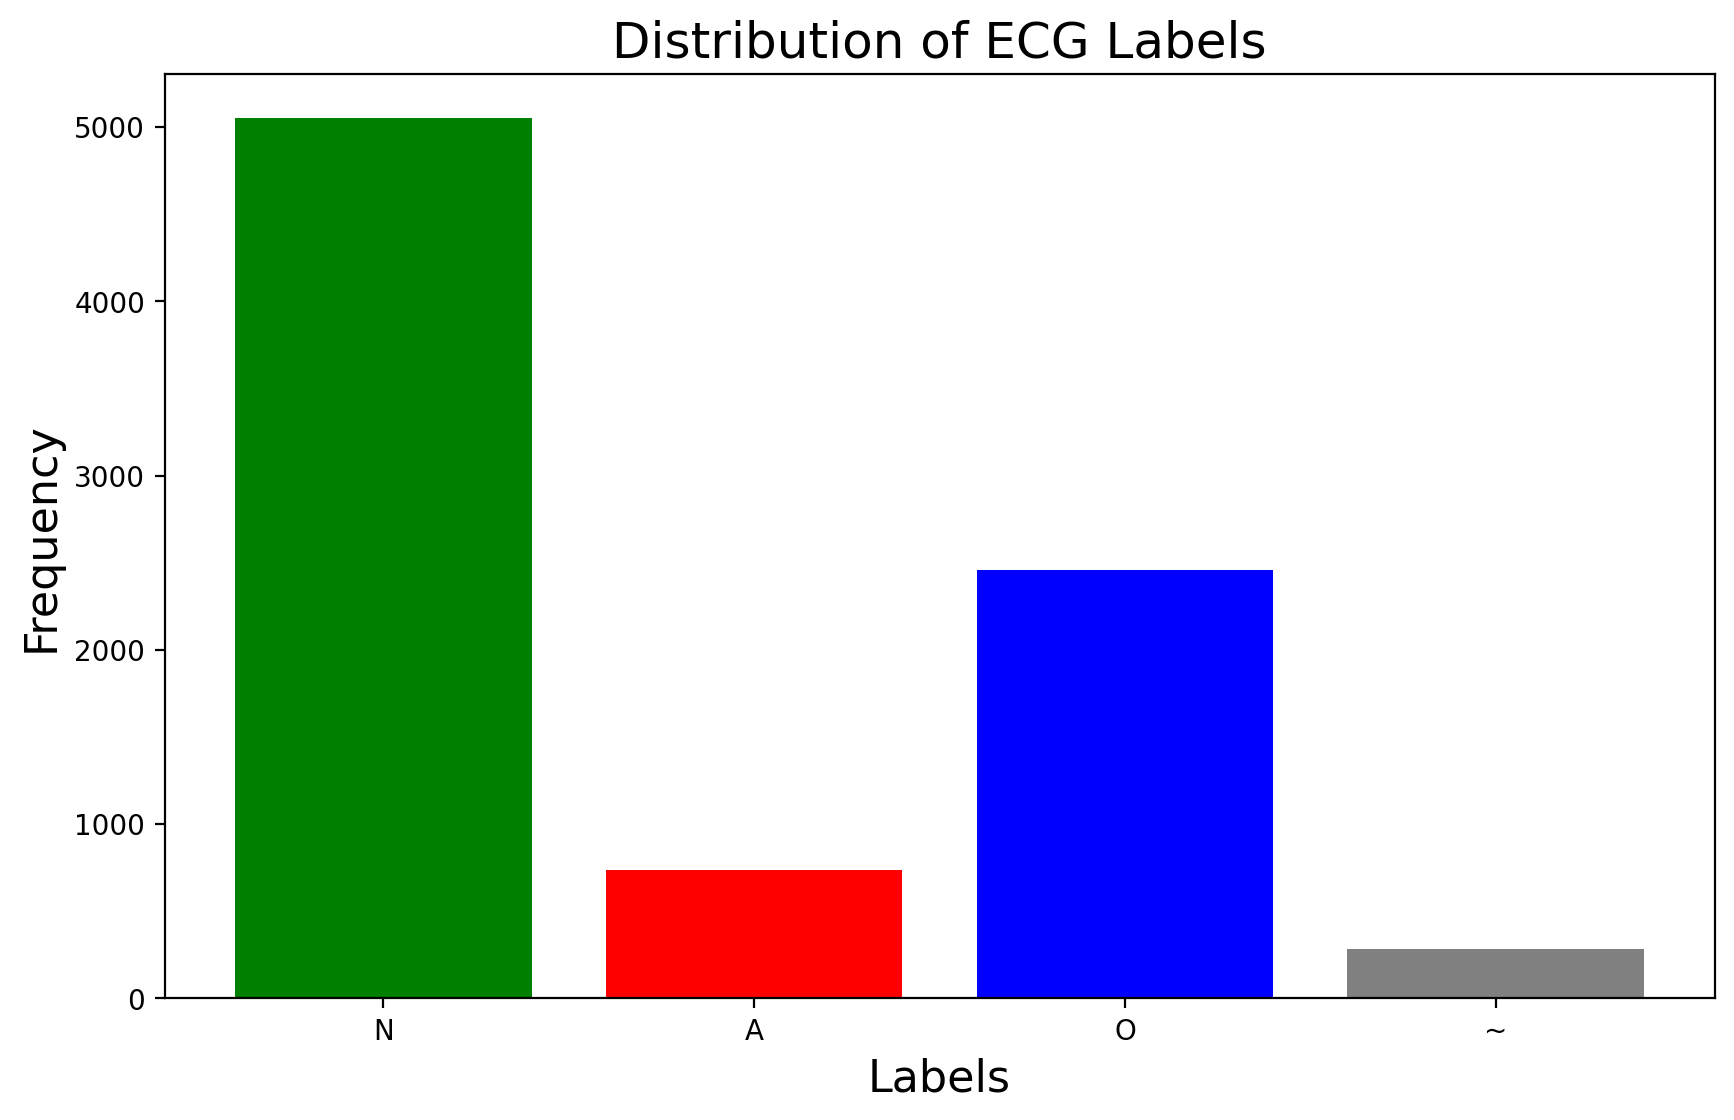

In [5]:
# Extract labels from the dataset
labels = [ecg_data[key]['label'] for key in ecg_data.keys()]

# Create a dictionary to count label frequencies
label_counts = {
    'N': labels.count('N'),
    'A': labels.count('A'),
    'O': labels.count('O'),
    '~': labels.count('~')
}

# Plot the label distribution
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values(), color=['green', 'red', 'blue', 'gray'])
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of ECG Labels')
plt.show()


### Visualize One Sample

In this section, we will visualize one sample ECG signal from the dataset. We will plot the ECG signal against time and label the plot with the corresponding rhythm type.


#### Instructions
1. Select a sample key to visualize.
2. Extract the signal and label for the selected sample.
3. Generate a timestamp array for the signal.
4. Plot the ECG signal with appropriate labels for the axes and the plot title.



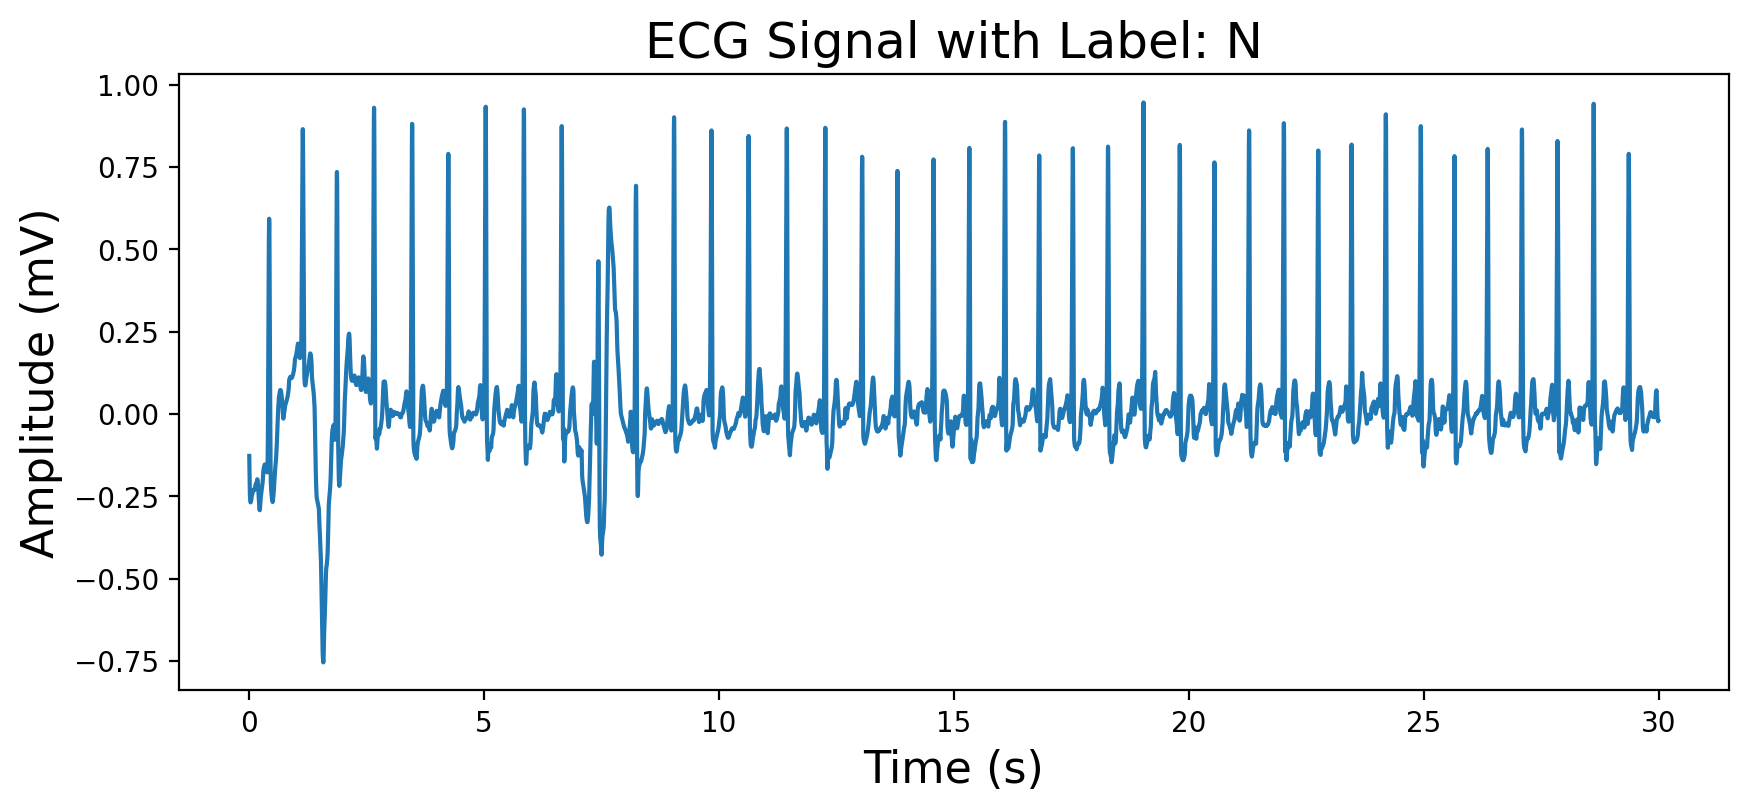

In [6]:
# Define the sample key to visualize
sample_key = 'A00001'

# Extract the signal and label for the selected sample
sample_signal = ecg_data[sample_key]['data']
sample_label = ecg_data[sample_key]['label']

# Define the sampling frequency (e.g., 300 Hz)
fs = 300  # Adjust this value based on your data

# Generate a timestamp array for the signal
sample_timestamp = np.arange(len(sample_signal)) / fs

# Plot the sample ECG signal
plt.figure(figsize=(10, 4))
plt.plot(sample_timestamp, sample_signal / 1000.0)
plt.title(f'ECG Signal with Label: {sample_label}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()

### Task 1: Visualize One ECG Recording Annotated with 'A' (Arrhythmia)

In this task, you will visualize one ECG recording from the dataset that is labeled with `A`, indicating arrhythmia.


#### Hint

You can refer to the code in the last block for selecting and visualizing the data, with a specific key

1. **Select a Sample Key**: Find a sample key in the dataset that has a label `'A'`.
2. **Extract the Signal and Label**: Retrieve the ECG signal and its corresponding label from the dataset.
3. **Generate a Timestamp Array**: Create a timestamp array by dividing the indices of the signal by the sampling frequency.
4. **Plot the ECG Signal**: Use `matplotlib` to plot the ECG signal against time. Label the plot with the appropriate title and axis labels.


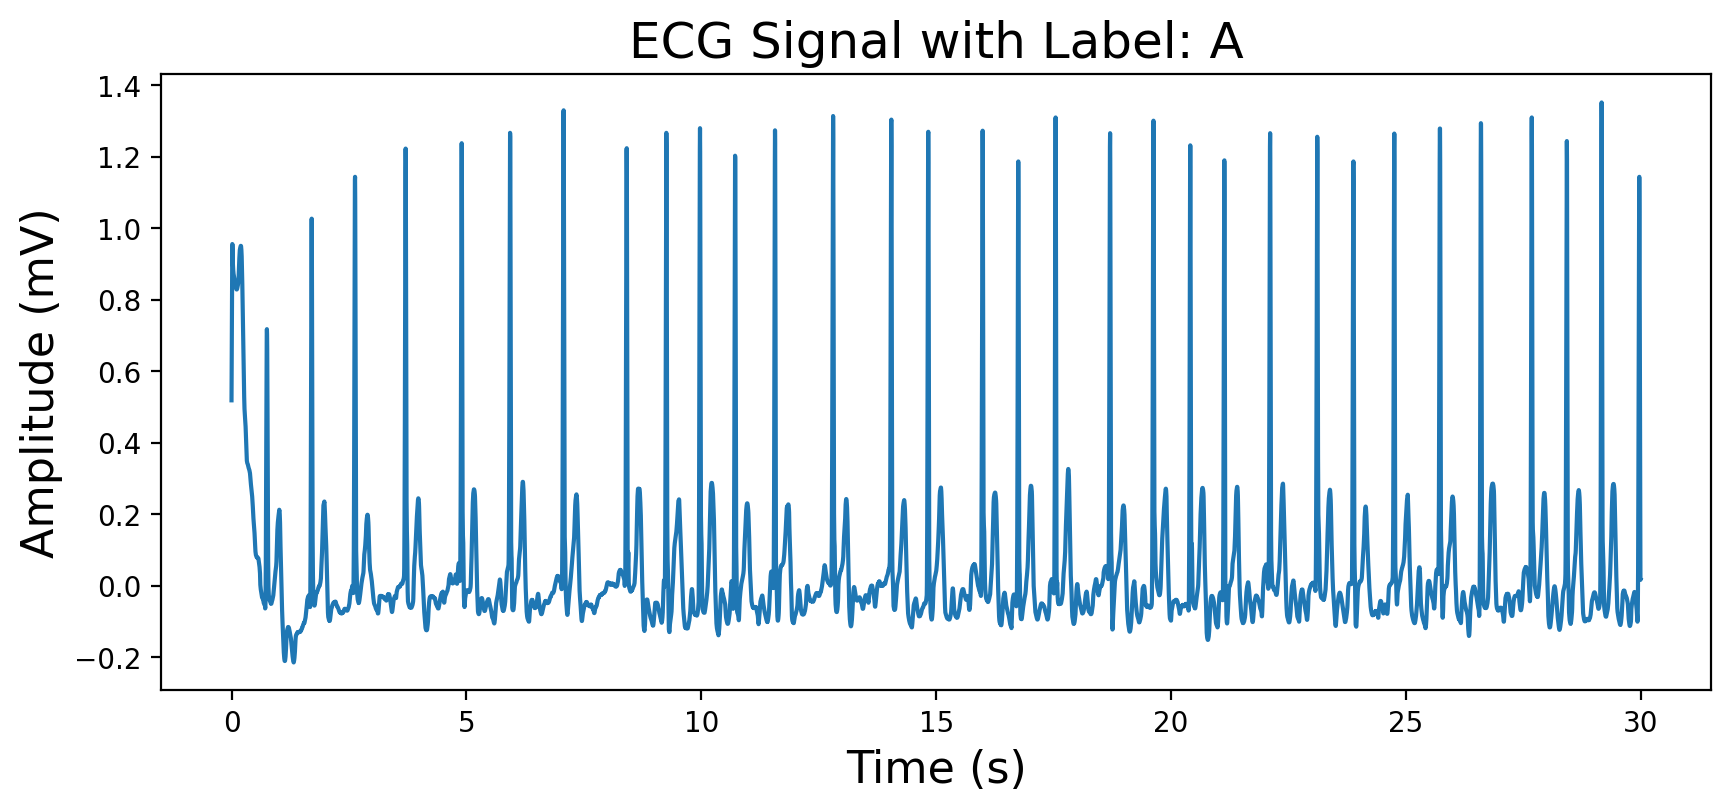

In [9]:
# Put your code here

## Find the sample key
for sample_key in ecg_data.keys():
    if ecg_data[sample_key]['label'] == 'A':
        break

# Extract the signal and label for the selected sample
sample_signal = ecg_data[sample_key]['data']
sample_label = ecg_data[sample_key]['label']

# Define the sampling frequency (e.g., 300 Hz)
fs = 300  # Adjust this value based on your data

# Generate a timestamp array for the signal
sample_timestamp = np.arange(len(sample_signal)) / fs

# Plot the sample ECG signal
plt.figure(figsize=(10, 4))
plt.plot(sample_timestamp, sample_signal / 1000.0)
plt.title(f'ECG Signal with Label: {sample_label}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()


## Section 2A Conventional Pipeline 

In this section, we will use a conventional machine learning pipeline to associate ECG data with their corresponding labels. The process involves data preprocessing, feature extraction, and training a machine learning model. 

If you are not interested in this approach, you can jump to [Section 2B: Deep Learning Pipeline](#section-2b-deep-learning-pipeline) for a deep learning alternative.

### Section 2A.1 Data Preprocessing
In this section, we will preprocess the ECG data using the `neurokit2` package. This involves cleaning the ECG signal, detecting peaks, and delineating the ECG waves.

### Data Preprocessing

We use the `neurokit2` package to clean the data. For detailed information on `neurokit2`, please refer to the [documentation](https://neuropsychology.github.io/NeuroKit/functions/ecg.html).


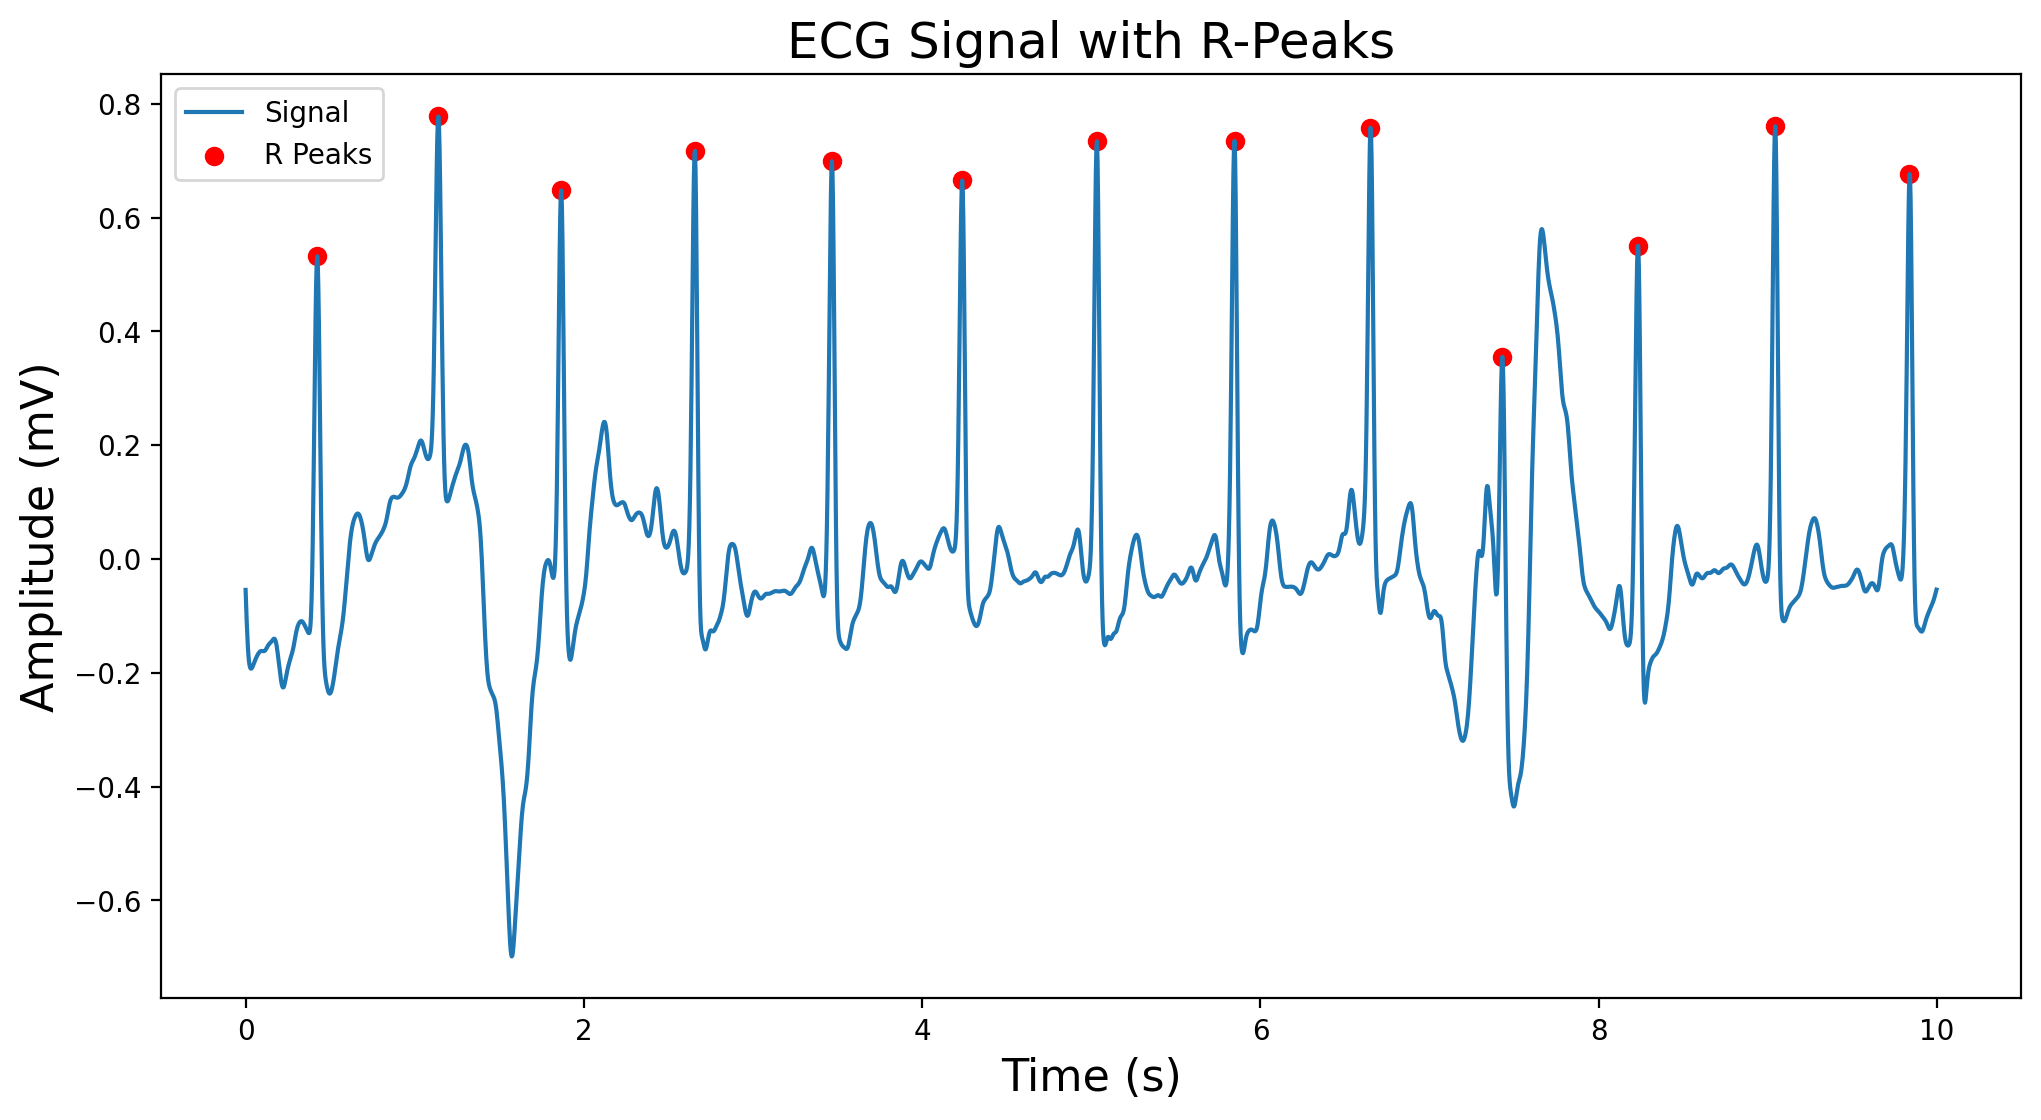

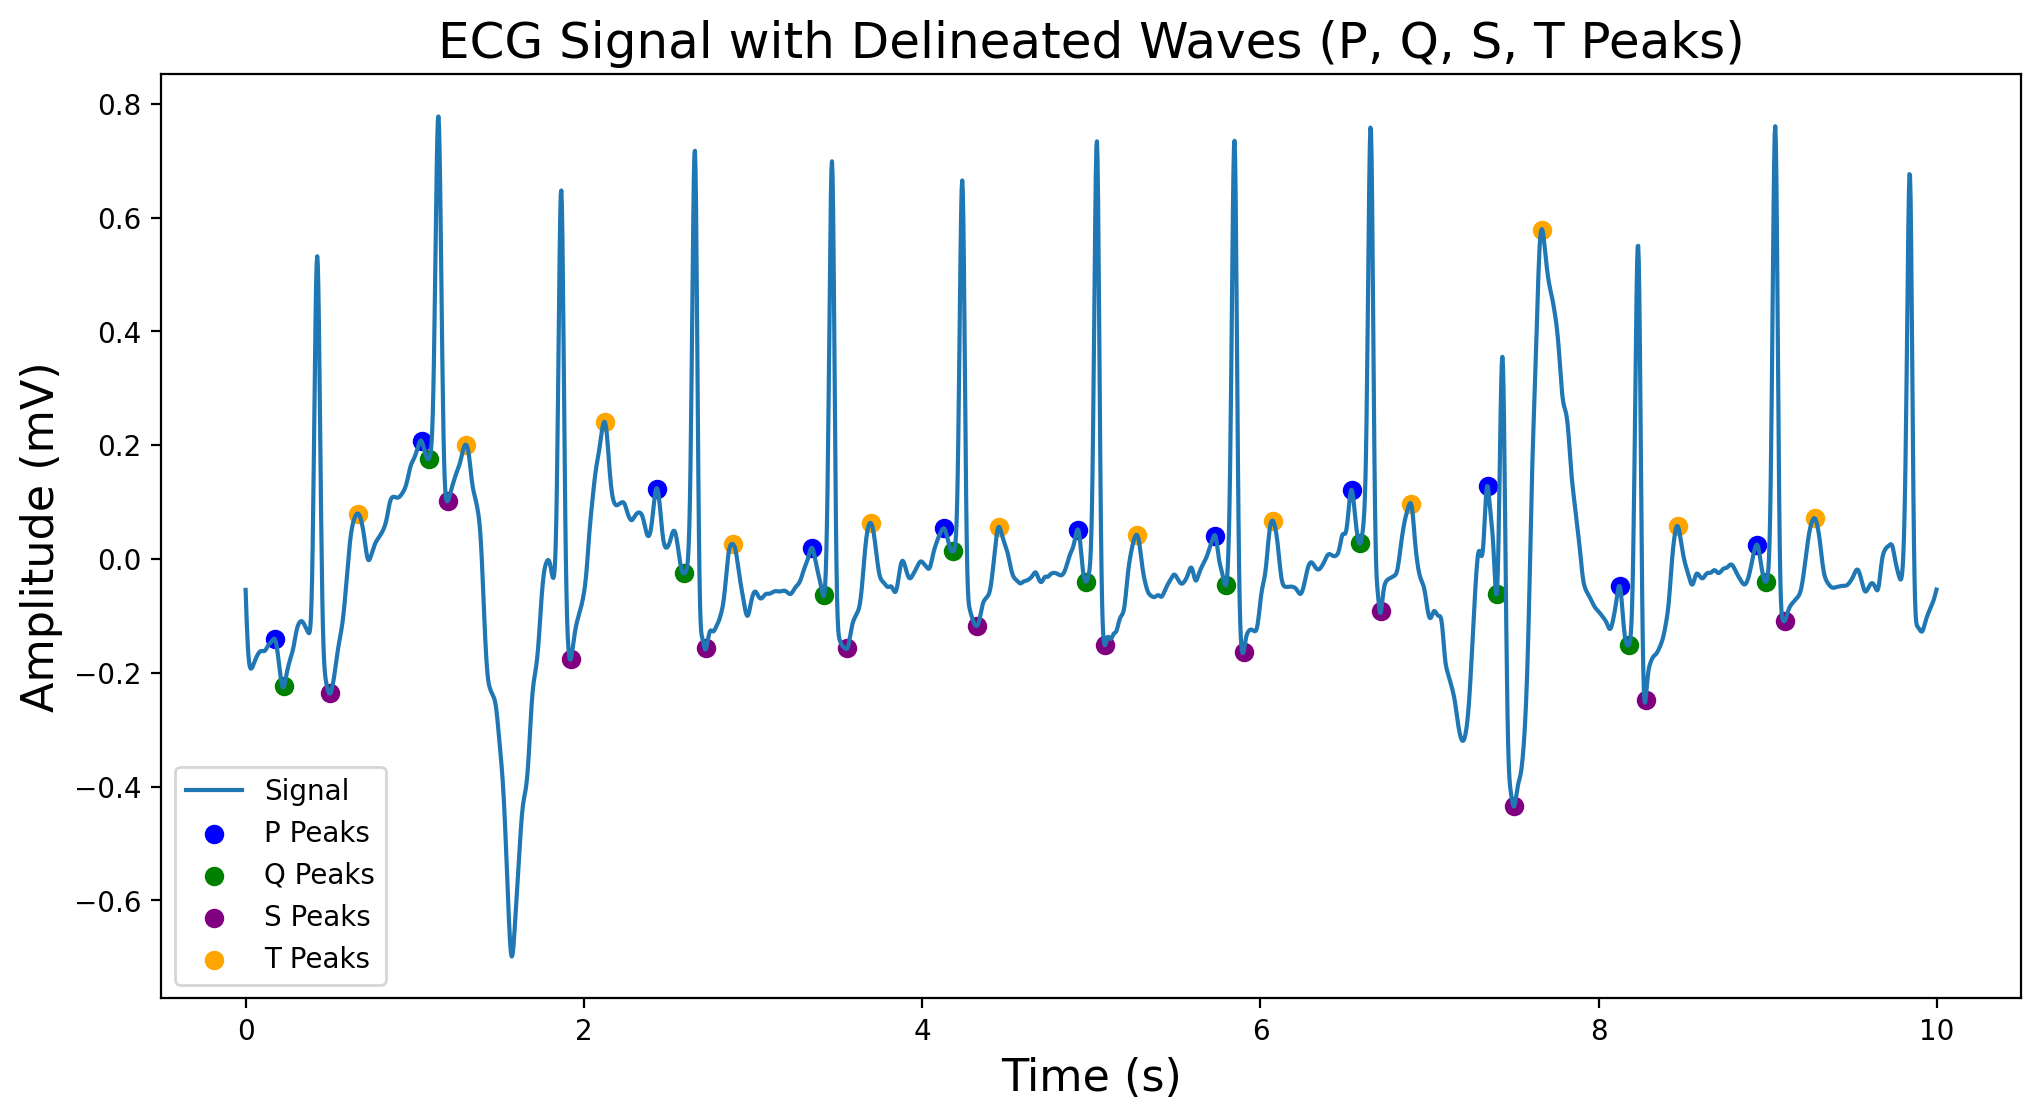

In [10]:
# Choose one single entry
sample_key = 'A00001'

# Extract the signal and label for the selected sample
sample_signal = ecg_data[sample_key]['data']
sample_label = ecg_data[sample_key]['label']

# Select a portion of the signal and convert to mV units
ecg_signal_raw = sample_signal[:3000] / 1000.0

# Define the sampling frequency
fs = 300  

# Generate a timestamp array for the signal in seconds
time_array = np.arange(len(ecg_signal_raw)) / fs

# Clean the ECG signal
ecg_signal = nk.ecg_clean(ecg_signal_raw, sampling_rate=fs)

# Detect peaks
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=fs)
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=fs, method="peak")

# Plot the cleaned ECG signal with R-peaks
plt.figure(figsize=(12, 6))
plt.plot(time_array, ecg_signal, label='Signal')
plt.scatter(time_array[rpeaks['ECG_R_Peaks']], ecg_signal[rpeaks['ECG_R_Peaks']], color='red', label='R Peaks')
plt.title('ECG Signal with R-Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()

# Plot the cleaned ECG signal with delineated waves (P, Q, S, T peaks) and update legend
plt.figure(figsize=(12, 6))
# Filter out NaN values from the peaks
p_peaks = np.array(waves_peak['ECG_P_Peaks'])
p_peaks = p_peaks[~np.isnan(p_peaks)].astype(int)

q_peaks = np.array(waves_peak['ECG_Q_Peaks'])
q_peaks = q_peaks[~np.isnan(q_peaks)].astype(int)

s_peaks = np.array(waves_peak['ECG_S_Peaks'])
s_peaks = s_peaks[~np.isnan(s_peaks)].astype(int)

t_peaks = np.array(waves_peak['ECG_T_Peaks'])
t_peaks = t_peaks[~np.isnan(t_peaks)].astype(int)

plt.plot(time_array, ecg_signal, label='Signal')
plt.scatter(time_array[p_peaks], ecg_signal[p_peaks], color='blue', label='P Peaks')
plt.scatter(time_array[q_peaks], ecg_signal[q_peaks], color='green', label='Q Peaks')
plt.scatter(time_array[s_peaks], ecg_signal[s_peaks], color='purple', label='S Peaks')
plt.scatter(time_array[t_peaks], ecg_signal[t_peaks], color='orange', label='T Peaks')
plt.title('ECG Signal with Delineated Waves (P, Q, S, T Peaks)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()


## Section 2A.2: Feature Extraction

In this section, we will extract various features from the preprocessed ECG signal. These features include morphological features, heart rate variability, and signal quality index.

### Feature Extraction

We will use the [BIOBSS](https://github.com/obss/BIOBSS) and `neurokit2` to extract the following features:
1. **Morphological Features**
2. **Heart Rate Variability Features**
3. **Signal Quality Index**

In [11]:
# Import necessary functions from the function modified BIOBSS library
from ECG_feature import from_Rpeaks, from_waves

# Define the sampling frequency
fs = 300  # Adjust this value based on your data

# Extract morphological ECG features
features_rpeaks = from_Rpeaks(ecg_signal, rpeaks['ECG_R_Peaks'], sampling_rate=fs, average=True)
features_waveforms = from_waves(ecg_signal, rpeaks['ECG_R_Peaks'], waves_peak, sampling_rate=fs, average=True)

# Print feature names from morphological features
print("Morphological features from R-peaks:")
print(list(features_rpeaks.keys()))
print(len(features_rpeaks.keys()))

print("Morphological features from waveforms:")
print(list(features_waveforms.keys()))
print(len(features_waveforms.keys()))

# Extract heart rate variability features
features_hrv = nk.hrv_time(rpeaks['ECG_R_Peaks'], sampling_rate=fs)

# Print feature names from HRV features
print("Heart rate variability features:")
print(list(features_hrv.columns))
# print(np.nan_to_num(np.array(features_hrv)))
print(len(features_hrv.columns))

# Extract signal quality index
sqi = nk.ecg_quality(ecg_signal, rpeaks=rpeaks['ECG_R_Peaks'], sampling_rate=fs, method='zhao2018', approach='fuzzy')
sqi_value = {'Excellent': 1, 'Unacceptable': 0, 'Barely acceptable': 0.5}

# Print signal quality index value
print("Signal Quality Index:")
print(sqi, sqi_value[sqi])

Morphological features from R-peaks:
['ecg_a_R', 'ecg_RR0', 'ecg_RR1', 'ecg_RR2', 'ecg_RRm', 'ecg_RR_0_1', 'ecg_RR_2_1', 'ecg_RR_m_1']
8
Morphological features from waveforms:
['ecg_t_PR', 'ecg_t_QR', 'ecg_t_RS', 'ecg_t_RT', 'ecg_t_PQ', 'ecg_t_PS', 'ecg_t_PT', 'ecg_t_QS', 'ecg_t_QT', 'ecg_t_ST', 'ecg_a_PQ', 'ecg_a_QR', 'ecg_a_RS', 'ecg_a_ST', 'ecg_a_PS', 'ecg_a_PT', 'ecg_a_QS', 'ecg_a_QT', 'ecg_a_ST_QS', 'ecg_a_RS_QR']
20
Heart rate variability features:
['HRV_MeanNN', 'HRV_SDNN', 'HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_SDRMSSD', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN']
25
Signal Quality Index:
Barely acceptable 0.5


Note: the total number of features is **8 + 20 + 25 + 1 = 54** which will be reflected below

### Feature extraction across all data

This script performs feature extraction on ECG data and prepares it for machine learning model development. The script either loads pre-generated features from a `.pkl` file or generates new features if the file is not available. 


In [12]:
from tqdm import tqdm
from ECG_feature import extract_feature

# Load the pre-generated features if available
try:
    with open('data/ECG_feature.pkl', 'rb') as f:
        saved_data = pk.load(f)
        features_all = saved_data['features']
        labels_all = saved_data['labels']
    print("Pre-generated features loaded from data/ECG_feature.pkl")
except FileNotFoundError:
    print("Pre-generated features not found, generating new features...")
    ''' 
    !!! Attention
    avoid generating this data; this would take a massive of time; I have already generated that for you. 
    '''
    features = []
    labels = []
    for key, value in tqdm(ecg_data.items(), desc='iterate all data', total=len(ecg_data)):
        ecg_signal = value['data']
        fs = 300  # Example sampling rate, replace with actual value if different
        try:
            extracted_features = extract_feature(ecg_signal, fs)
        except:
            extracted_features = np.zeros(54,)
        # print(key)
        # print(len(extracted_features))
        # print(extracted_features)
        features.append(extracted_features)
        labels.append(value['label'])
    
    features_all = np.stack(features, axis=0)
    labels_all = np.array(labels)
    
    # Save to a .pkl file
    data_to_save = {
        'features': features_all,
        'labels': labels_all
    }
    
    with open('data/ECG_feature.pkl', 'wb') as f:
        pk.dump(data_to_save, f)
    
    print("New features generated and saved to data/ECG_feature.pkl")

# Now you can use features_all and labels_all for further processing or model training
print("Features shape:", features_all.shape)
print("Labels shape:", labels_all.shape)


Pre-generated features loaded from data/ECG_feature.pkl
Features shape: (8528, 54)
Labels shape: (8528,)


## Section 2A.3 Train Model based on RandomForest

In this section, we will train a RandomForest model using the features extracted from the ECG data. We will also normalize the features and evaluate the model's performance on validation and test sets.


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode labels
X = features_all
y = labels_all
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Feature normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train the model on normalized data
model.fit(X_train_scaled, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val_scaled)
print("Validation set performance (normalized):")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

# Evaluate the best model on the test set
y_test_pred = model.predict(X_test_scaled)
print("Test set performance (normalized):")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))


Validation set performance (normalized):
              precision    recall  f1-score   support

           A       0.79      0.63      0.70       106
           N       0.84      0.93      0.88       755
           O       0.70      0.65      0.68       370
           ~       0.75      0.19      0.30        48

    accuracy                           0.80      1279
   macro avg       0.77      0.60      0.64      1279
weighted avg       0.79      0.80      0.78      1279

Test set performance (normalized):
              precision    recall  f1-score   support

           A       0.74      0.62      0.67       104
           N       0.84      0.92      0.88       794
           O       0.69      0.60      0.65       346
           ~       0.69      0.25      0.37        36

    accuracy                           0.79      1280
   macro avg       0.74      0.60      0.64      1280
weighted avg       0.78      0.79      0.78      1280



### Task 2A Write a function for inference based on your signal

In this task, we will write a function called `Infer_ECG` to perform inference on a new ECG signal. This function will:
1. Extract features using the `extract_feature` function.
2. Normalize the features using a pre-fitted scaler.
3. Derive the probability using the trained model.
4. Print the output with the predicted class.

In [14]:
# Answer 

def Infer_ECG(x):
    # Example sampling rate, replace with actual value if different
    fs = 300  
    
    # Extract features
    try:
        extracted_features = extract_feature(x, fs)
    except:
        extracted_features = np.zeros(54,)  # Assuming 54 features as default
    
    # Convert to 2D array as the model expects batch input
    extracted_features = np.array(extracted_features).reshape(1, -1)
    
    # Normalize features
    extracted_features_scaled = scaler.transform(extracted_features)
    
    # Derive probability
    predicted_class = model.predict(extracted_features_scaled)[0]

    # Get the class name from the label encoder
    class_name = le.inverse_transform([predicted_class])[0]
    
    # Print the output
    print(f'This recording is likely to be {class_name}')

In [15]:
# Test your function
Infer_ECG(ecg_signal) 

This recording is likely to be N


## Section 2B Deep Learning (End to End) Pipeline 

In this section, we will create a deep learning pipeline to train an end-to-end model on ECG data. This pipeline includes data preprocessing, model definition, training, evaluation, and saving/loading the model for inference.

In [16]:
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import torch.optim as optim
import torch.nn as nn
import torch

from sklearn.model_selection import train_test_split

### Section 2B.1 Data Preparation

In this section, we will prepare the ECG data for training a deep learning model using PyTorch. The steps include creating a custom dataset class, splitting the data into train, validation, and test sets, and creating DataLoader instances.


#### Define Label Mapping and Custom Dataset Class

In [17]:
label_mapping = {
    'N': 0,
    'A': 1,
    'O': 2,
    '~': 3
}
class ECGLoader(Dataset):
    def __init__(self, data, sampling_rate, crop_duration=10):
        self.data = data
        self.keys = list(self.data.keys())
        self.sampling_rate = sampling_rate
        self.crop_duration = crop_duration
        self.crop_length = crop_duration * sampling_rate
    
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample_key = self.keys[idx]
        ecg_signal = self.data[sample_key]['data'] / 1000.0  # Normalizing the signal
        label = self.data[sample_key]['label']
                
        # Clean the ECG signal
        ecg_signal = nk.ecg_clean(ecg_signal, sampling_rate=self.sampling_rate)

        # Crop the signal to the specified duration (10 seconds)
        ecg_signal = self._crop_signal(ecg_signal).reshape(1, -1)

        # Convert to torch tensor
        ecg_signal = torch.tensor(ecg_signal.copy(), dtype=torch.float32)
        label = torch.tensor(label_mapping[label], dtype=torch.long)
        
        return ecg_signal, label
    
    def _crop_signal(self, signal):
        if len(signal) > self.crop_length:
            start = np.random.randint(0, len(signal)-self.crop_length)
            signal = signal[start:start + self.crop_length]
        else:
            signal = np.pad(signal, (0, self.crop_length-len(signal)), 'constant')
        return signal

#### Create Dataset Instance

In [18]:
# Create a dataset instance
dataset = ECGLoader(ecg_data, sampling_rate=300)
print(dataset[0][0].shape)

torch.Size([1, 3000])


#### Split Indices for Train, Validation, and Test Sets

In [19]:
# Split indices for train, validation, and test sets
dataset_size = len(dataset)
indices = list(range(dataset_size))
train_indices, temp_indices = train_test_split(indices, test_size=0.3, random_state=42)
val_indices, test_indices = train_test_split(temp_indices, test_size=0.5, random_state=42)

# Create samplers for each set
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
test_sampler = SubsetRandomSampler(test_indices)

#### Create Dataloder Instances

In [20]:
# Create DataLoader instances for each set
batch_size = 128
train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)
test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)

### Section 2B.2 Model Preparation
!!! If you want to accelerate with GPU, and if you have, uncomment all .cuda()



In [21]:
from model import resnet1d18

ecg_model = resnet1d18(num_classes=4, input_channels=1).cuda()
optimizer = optim.Adam(ecg_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().cuda()

### Section 2B.3 Model Training

In this section, we will train a deep learning model using the prepared ECG data. The training loop will include forward and backward passes, loss computation, and optimizer steps. We will also evaluate the model on the validation set after each epoch.
!!! If you want to accelerate with GPU, and if you have, uncomment all .cuda()


In [22]:
# Training loop
num_epochs = 20

for epoch in range(num_epochs):
    ecg_model.train()
    running_loss = 0.0
    for data, labels in train_loader:
        optimizer.zero_grad()
        data = data.cuda()
        labels = labels.cuda()
        outputs = ecg_model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * data.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

    # Validation step
    ecg_model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, labels in val_loader:
            data = data.cuda()
            labels = labels.cuda()
            outputs = ecg_model(data)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * data.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss /= len(val_loader.dataset)
    val_accuracy = correct / total
    
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}')

Epoch 1/20, Loss: 0.6869
Validation Loss: 0.1395, Accuracy: 0.6208
Epoch 2/20, Loss: 0.5744
Validation Loss: 0.1192, Accuracy: 0.6411
Epoch 3/20, Loss: 0.5161
Validation Loss: 0.1112, Accuracy: 0.6833
Epoch 4/20, Loss: 0.4862
Validation Loss: 0.1160, Accuracy: 0.6849
Epoch 5/20, Loss: 0.4705
Validation Loss: 0.1075, Accuracy: 0.7037
Epoch 6/20, Loss: 0.4612
Validation Loss: 0.0981, Accuracy: 0.7404
Epoch 7/20, Loss: 0.4530
Validation Loss: 0.0929, Accuracy: 0.7318
Epoch 8/20, Loss: 0.4414
Validation Loss: 0.0997, Accuracy: 0.7381
Epoch 9/20, Loss: 0.4462
Validation Loss: 0.1017, Accuracy: 0.7146
Epoch 10/20, Loss: 0.4246
Validation Loss: 0.0938, Accuracy: 0.7404
Epoch 11/20, Loss: 0.4227
Validation Loss: 0.0936, Accuracy: 0.7553
Epoch 12/20, Loss: 0.4258
Validation Loss: 0.0954, Accuracy: 0.7522
Epoch 13/20, Loss: 0.4160
Validation Loss: 0.0923, Accuracy: 0.7608
Epoch 14/20, Loss: 0.4163
Validation Loss: 0.0935, Accuracy: 0.7584
Epoch 15/20, Loss: 0.4080
Validation Loss: 0.0868, Accura

### Section 2B.4 Test Evaluation

In [24]:
from sklearn.metrics import classification_report

# Evaluate on test set
ecg_model.eval()
test_loss = 0.0
all_labels = []
all_predictions = []

with torch.no_grad():
    for data, labels in test_loader:
        data = data.cuda()
        labels = labels.cuda()
        outputs = ecg_model(data)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * data.size(0)
        
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

test_loss /= len(test_loader.dataset)
test_accuracy = (np.array(all_predictions) == np.array(all_labels)).mean()

print(f'Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}')
print("Classification Report:")
print(classification_report(all_labels, all_predictions, target_names=['N', 'A', 'O', '~']))

Test Loss: 0.0906, Accuracy: 0.7695
Classification Report:
              precision    recall  f1-score   support

           N       0.81      0.93      0.87       794
           A       0.71      0.49      0.58       104
           O       0.64      0.53      0.58       346
           ~       0.83      0.28      0.42        36

    accuracy                           0.77      1280
   macro avg       0.75      0.56      0.61      1280
weighted avg       0.76      0.77      0.76      1280



### Task 2B Write a function for inference based on your signal

Here we define the Infer_ECG function for performing inference on a new ECG signal using the trained deep learning model. The function will normalize the signal to 10 seconds, reshape it for the model, derive the probability, and print the output.



### Hint

In this task, we will define a function called `Infer_ECG` to perform inference on a new ECG signal using a trained deep learning model. The function will:
1. Normalize the signal to 10 seconds.
2. Reshape the signal for the deep learning model.
3. Derive the probability of the signal belonging to each class.
4. Print the output with the predicted class and its probability.

In [27]:
# Answer
def Infer_ECG(x):
    # Crop or pad your signal to 10 seconds (refer to dataloader)
    target_length = 3000  # Assuming a sampling rate of 300 Hz, 10 seconds is 3000 samples
    
    if len(x) > target_length:
        x = x[:target_length]
    else:
        x = np.pad(x, (0, target_length - len(x)), 'constant')
 
    # Reshape for the format of deep learning model 
    x = x.reshape(1, 1, -1)
    x = torch.tensor(x, dtype=torch.float32).cuda()
    
    # Derive probability
    ecg_model.eval()
    with torch.no_grad():
        outputs = ecg_model(x) 
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted_class = np.argmax(probabilities)
    
    # Get the class name from the label encoder
    class_name = le.inverse_transform([predicted_class])[0]
    
    # Print the output
    print(f'This recording is likely to be {class_name} with probability {probabilities[predicted_class]:.2f}')

    

In [28]:
# Test your function
Infer_ECG(ecg_signal)

This recording is likely to be A with probability 0.90


## Section 3 Use your own ECG recording

In this section, you will be given one ECG recording collected from Apple Watch, please use your developed machine learning model to infer whether this belongs to normal, AF, other, or noisy recordings.

If you have Apple Watch, and want to use your own recording, please follow this to generate your report 
https://support.apple.com/en-gb/120278 **View and share your Health information**



![Apple Watch](./misc/iphone.png)

### Demo of using provided function pdf_to_image to read ECG recordings 

In [29]:
from PDFReader import pdf_to_image, extract_values
import matplotlib.pyplot as plt
import numpy as np

22569it [00:00, 3241379.50it/s]

Length of 'PDF': 15169


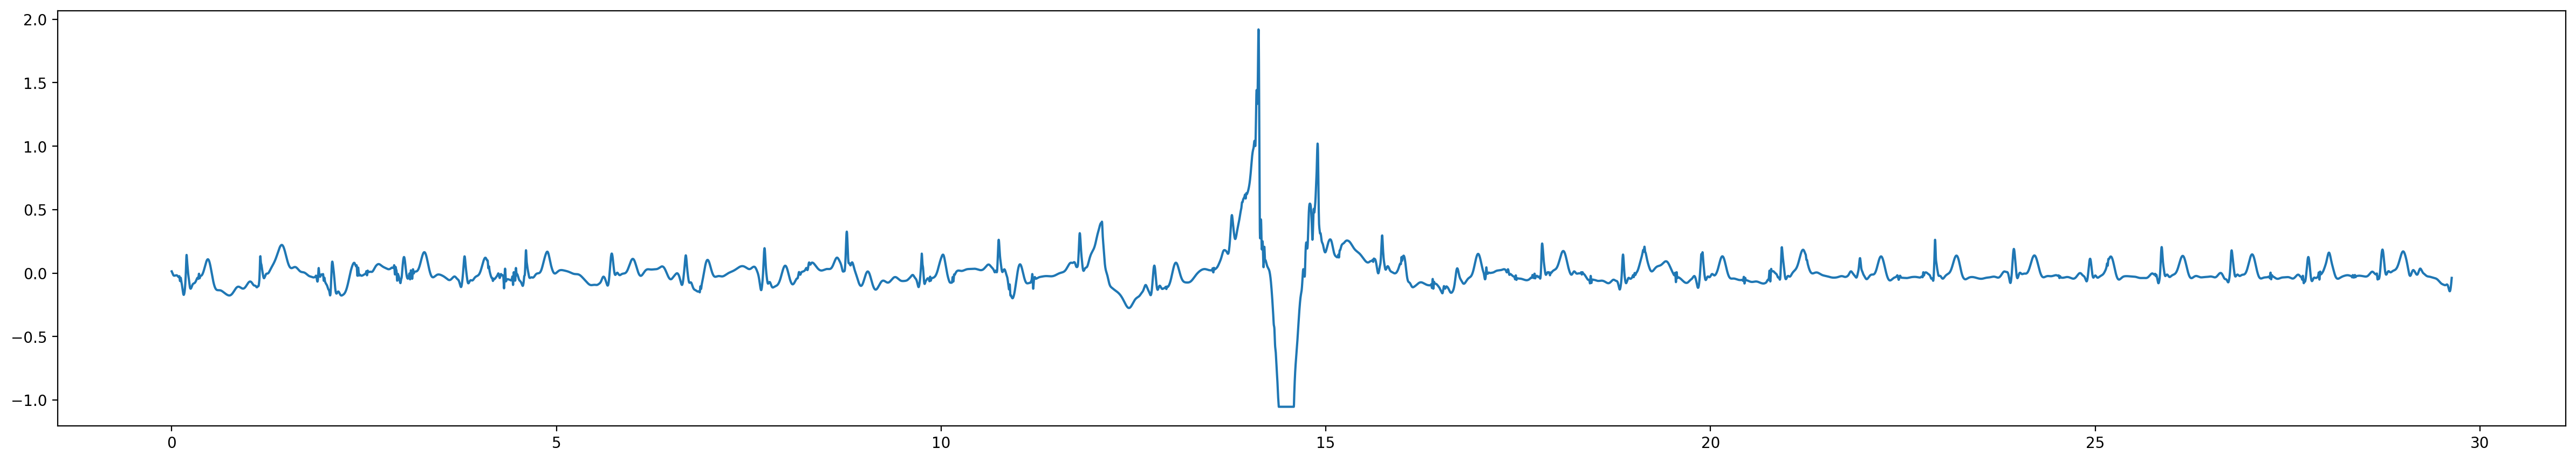

In [30]:
# Convert pdf to image using package and extract values
op_list = pdf_to_image('./data/examplePDF.pdf')
y = extract_values(op_list)

# Graph the resulting 'y' values
print("Length of 'PDF':", len(y))
plt.figure(figsize=(30, 5))
sampling_frequency = 511.844
time = np.arange(len(y)) / sampling_frequency
plt.plot(time, y, label='Raw')

### Task 3 Test on your own recording

### Hint 
1. Convert the signal to the same frequency (fs=300Hz)
2. Apply inference code

In [34]:
# Write your code here

## Resample
from scipy import signal
f = 300
ecg_signal = signal.resample(y, int(len(y)/sampling_frequency*f))

## Apply Infer_ECG function
Infer_ECG(ecg_signal)

This recording is likely to be A with probability 0.81
